**3η ΟΜΑΔΙΚΗ ΕΡΓΑΣΙΑ**

Ειρήνη Δόντη, ΑΜ: 03119839

**1. Θεωρητικό μέρος**

**β.**

1. Το Bounding box είναι το παραλληλόγραμμο που περιέχει ένα αντικείμενο της εικόνας ως απάντηση στον αλγόριθμο. Περιέχει πληροφορίες για τις συντεταγμένες του αντικειμένου και βοηθά στο να αναγνωρίζεται η θέση του αντικειμένου από τον αλγόριθμο.
Αντίθετα, το anchor box είναι ένα παραλληλόγραμμο που προσεγγίζει το πως θα είναι το bounding box, για παράδειγμα το anchor box της κλάσης των ανθρώπων έχει μεγαλύτερο ύψος από πλάτος, ώστε να μπορούν να εντοπιστούν παραπάνω από ένα αντικείμενα στο ίδιο σημείο.

2. O πίνακας εξόδου θα έχει διαστάσεις 27x1 και θα είναι της ακόλουθης μορφής:
 \begin{align}
    y &= \begin{bmatrix}
           p_{c} \\
           b_{x} \\
           b_{y} \\
           b_{h} \\
           b_{w} \\
           c_{1} \\
           c_{2} \\
           c_{3} \\
           c_{4} \\
           p_{c} \\
           b_{x} \\
           .\\
           .\\
           .\\
           c_{4} \\
         \end{bmatrix}
  \end{align}
Τo  $p_{c}$ είναι ένας αριθμός ανάμεσα στο 0 και το 1 που δηλώνει αν ανιχνεύτηκε κάτι ή όχι. Έχουμε ένα $p_{c}$ για κάθε anchor box. Τα $b_{x}$, $b_{y}$, $b_{h}$ και $b_{w}$ δηλώνουν τις συντεταγμένες των τρια bounding box, ένα για κάθε anchor box. Τέλος, τα $c_{1}$, $c_{2}$, $c_{3}$, $c_{4}$ δηλώνουν σε ποια κλάση από τις 4 ανήκει το αντικείμενο που ανιχνεύτηκε.

3. Όταν εκτελείται ο αλγόριθμος YOLO, αρκετές φορές επιστρέφει για το ίδιο αντικείμενο πολλά Bounding boxes. Εμείς, όμως, θέλουμε η ανίχνευση να γίνει μόνο μία φορά, οπότε, για να το εξασφαλίσουμε αυτό, χρησιμοποιούμε την μέθοδο Non-Max Suppression. Με βάση αυτή τη μέθοδο όταν προβλέπονται πολλά bounding boxes, τότε επιλέγεται αυτό με το μεγαλύτερο pc. 

  Με τον όρο threshold εννοούμε το κατώφλι που απαιτείται για να θεωρηθεί ένα προβλεπόμενο bounding box ως ένα αντικείμενο. Όσο πιο μεγάλο threshold, τόσο πιο πολλές προβλέψεις απορρίπτονται και όσο πιο μικρό threshold τόσο πιο πολλές προβλέψεις γίνονται δεκτές. Αυτό όμως επηρεάζει την απόδοση της μεθόδου Non-max suppression, καθώς υπάρχει κίνδυνος να απορριφθούν σωστές προβλέψεις (μεγάλο threshold) ή να γίνουν δεκτές λανθασμένες προβλέψεις (μικρό threshold).
  
  Η παράμετρος επικάλυψης καθορίζει το ποσοστό επικάλυψης για το οποίο θεωρείται ότι δύο bounding boxes είναι επικαλυπτόμενα. Όταν περισσότερα των δύο bounding boxes έχουν υψηλότερη επικάλυψη από αυτήν την παράμετρο, το ένα από αυτά αφαιρείται από την τελική έξοδο. Όσο πιο μικρό είναι το ποσοστό επικάλυψης τόσο πιο πολλές προβλέψεις μπορεί να εμφανίζονται.

4. Ο αλγόριθμος SORT χρησιμοποιείται για την παρακολούθηση αντικειμένων και μπορεί να επεξεργάζεται ροές από βίντεο σε πραγματικό χρόνο. Συγκριτικά με άλλες μεθόδους, ο SORT επιτυγχάνει την υψηλότερη βαθμολογία MOTA για τους διαδικτυακούς trackers και είναι συγκρίσιμος με την προηγμένη μέθοδο NOMT, η οποία είναι σημαντικά πιο περίπλοκη και χρησιμοποιεί πλαίσια στο κοντινό μέλλον. Επιπλέον, καθώς ο SORT στοχεύει να επικεντρωθεί σε frame-to-frame συσχετίσεις, ο αριθμός των χαμένων στόχων είναι πολύ μικρός. 

5. Η μέθοδος tracking-by-detection είναι μια διαδικασία παρακολούθησης αντικειμένων με τη βοήθεια αλγορίθμου παρακολούθησης. Tracking-by-detection έχουμε όταν μέσω μιας άλλης μεθόδου (πχ YOLO) ανιχνεύονται τα αντικείμενα σε κάθε frame του βίντεο. Μόλις το σύστημα ανιχνεύσει τα αντικείμενα, πρέπει να κάνει tracking των δεδομένων που προέκυψαν από αυτές τις ανιχνεύσεις. Για το tracking χρησιμοποιούνται μοντέλα κίνησης που δεν περιέχουν μηχανική μάθηση, όπως για παράδειγμα το Kalman filter. Άρα, η βαθειά μάθηση μπορεί να χρησιμοποιηθεί μόνο για oject detection και όχι για tracking-by-detection.







# Object Detection and Tracking with YOLOv3 and SORT

In [ ]:
import sys
!{sys.executable} -m pip install torch==1.5.0 torchvision==0.6.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.5.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.5.0


In [ ]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install filterpy==1.4.5
!{sys.executable} -m pip install scikit-image==0.17.2
!{sys.executable} -m pip install lap==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=889af687aa7bca8797d0f589d2f0b663307d6b93dc715d490d2506fe758a2a6a
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 54.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Mount to google drive.
Το κάνουμε αυτό για έχουμε πρόσβαση στα python modules που χρειαζόμαστε.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Για να μπορέσετε να έχετε πρόσβαση σε όλα τα αρχεία του φακέλου Lab_motion_tracking_exercise θα πρέπει πριν τρέξετε το παρακάτω κελί να πατε στο drive του εργαστηρίου, να κάνετε δεξί κλικ στο Lab_motion_tracking_exercise, να πατήσετε Add a shortcut to drive και μετά να πατήσετε My Drive.

In [ ]:
import sys
import os 
sys.path.insert(0,'/content/drive/My Drive/Lab_motion_tracking_exercise') 
print(os.listdir('/content/drive/My Drive/Lab_motion_tracking_exercise')) # Έλεγχος ότι έχουμε όλα τα απαραίτητα αρχεία

Φορτώνουμε τις απαραίτητες βιβλιοθήκες

In [ ]:
from models import *
from utils import *

import os, sys, time, datetime, random
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [ ]:
import os
print(os.getcwd())

In [ ]:
config_path='./drive/My Drive/Lab_motion_tracking_exercise/config/yolov3.cfg'
weights_path='./drive/My Drive/Lab_motion_tracking_exercise/config/yolov3.weights' # Φορτώνουμε τα προ-εκπαιδευμένα στο COCO dataset βάρη του μοντέλου YOLOv3
class_path='./drive/My Drive/Lab_motion_tracking_exercise/config/coco.names'  #  φορτώνουμε τις μονο τις κλάσεις που θέλουμε να κάνουμε detection (ανθρώπους, αυτοκίνητα κλπ) 

img_size=416
conf_thres=0.7
nms_thres=0.4 # NMS threshold


# Load model and weights
model = Darknet(config_path, img_size=img_size)
model.load_weights(weights_path)
model.cuda()
model.eval()
classes = utils.load_classes(class_path)
Tensor = torch.cuda.FloatTensor

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
def detect_image(img):
    # scale and pad image
    ratio = min(img_size/img.size[0], img_size/img.size[1])
    imw = round(img.size[0] * ratio)
    imh = round(img.size[1] * ratio)
    img_transforms = transforms.Compose([ transforms.Resize((imh, imw)),
         transforms.Pad((max(int((imh-imw)/2),0), max(int((imw-imh)/2),0), max(int((imh-imw)/2),0), max(int((imw-imh)/2),0)),
                        (128,128,128)),
         transforms.ToTensor(),
         ])
    # convert image to Tensor
    image_tensor = img_transforms(img).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input_img = Variable(image_tensor.type(Tensor))
    # run inference on the model and get detections
    with torch.no_grad():
        detections = model(input_img)
        detections = utils.non_max_suppression(detections, 80, conf_thres, nms_thres)
    return detections[0]

Inference Time: 0:00:02.003125


<Figure size 640x480 with 0 Axes>

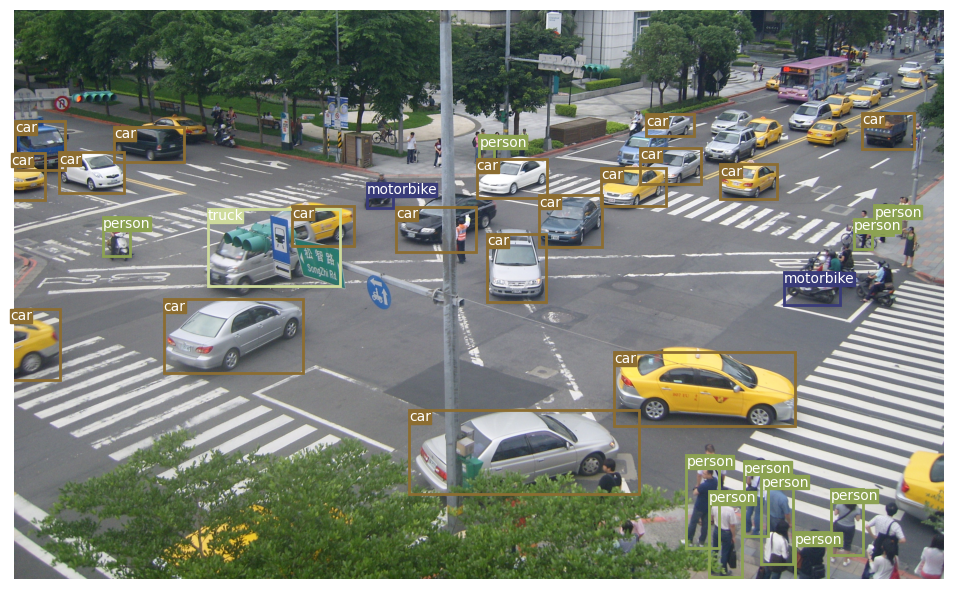

In [ ]:
# load image and get detections
#print(os.getcwd())
img_path = "./drive/My Drive/Lab_motion_tracking_exercise/images/Intersection-Counts.jpg"
prev_time = time.time()
img = Image.open(img_path)
detections = detect_image(img)
inference_time = datetime.timedelta(seconds=time.time() - prev_time)
print ('Inference Time: %s' % (inference_time))

# Get bounding-box colors
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

img = np.array(img)
plt.figure()
fig, ax = plt.subplots(1, figsize=(12,9))
ax.imshow(img)

pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
unpad_h = img_size - pad_y
unpad_w = img_size - pad_x

if detections is not None:
    unique_labels = detections[:, -1].cpu().unique()
    n_cls_preds = len(unique_labels)
    bbox_colors = random.sample(colors, n_cls_preds)
    # browse detections and draw bounding boxes
    for x1, y1, x2, y2, conf, cls_conf, cls_pred in detections.cpu():
        box_h = ((y2 - y1) / unpad_h) * img.shape[0]
        box_w = ((x2 - x1) / unpad_w) * img.shape[1]
        y1 = ((y1 - pad_y // 2) / unpad_h) * img.shape[0]
        x1 = ((x1 - pad_x // 2) / unpad_w) * img.shape[1]
        color = bbox_colors[int(np.where(unique_labels == int(cls_pred))[0])]
        bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(bbox)
        plt.text(x1, y1, s=classes[int(cls_pred)], color='white', verticalalignment='top',
                bbox={'color': color, 'pad': 0})
plt.axis('off')
# save image
#plt.savefig(img_path.replace(".jpg", "-det.jpg"), bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
%pylab inline 
import cv2
from IPython.display import clear_output
from sort import *

def detect():
  videopath = './drive/My Drive/28.mp4'  # Εδώ θα αλλάξετε το path για να πάρετε το video που αντιστοιχεί στην ομάδα σας
                                                                        # Το video θα πρεπει αρχικά να το έχετε βάλει στο drive σας 
  cmap = plt.get_cmap('tab20b')
  colors = [cmap(i)[:3] for i in np.linspace(0, 1, 20)]

  # initialize Sort object and video capture

  vid = cv2.VideoCapture(videopath)
  mot_tracker = Sort() 
  frames = vid.get(cv2.CAP_PROP_FRAME_COUNT)
  #while(True):
  for ii in range(int(frames)):
      ret, frame = vid.read()
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      pilimg = Image.fromarray(frame)
      detections = detect_image(pilimg)

      img = np.array(pilimg)
      pad_x = max(img.shape[0] - img.shape[1], 0) * (img_size / max(img.shape))
      pad_y = max(img.shape[1] - img.shape[0], 0) * (img_size / max(img.shape))
      unpad_h = img_size - pad_y
      unpad_w = img_size - pad_x
      if detections is not None:
          print("ii", ii)
          print(detections.shape)
          tracked_objects = mot_tracker.update(detections.cpu())
          print(tracked_objects.shape)

          unique_labels = detections[:, -1].cpu().unique()
          n_cls_preds = len(unique_labels)
          for x1, y1, x2, y2, obj_id, cls_pred in tracked_objects:
              box_h = int(((y2 - y1) / unpad_h) * img.shape[0])
              box_w = int(((x2 - x1) / unpad_w) * img.shape[1])
              y1 = int(((y1 - pad_y // 2) / unpad_h) * img.shape[0])
              x1 = int(((x1 - pad_x // 2) / unpad_w) * img.shape[1])

              color = colors[int(obj_id) % len(colors)]
              color = [i * 255 for i in color]
              cls = classes[int(cls_pred)]
              cv2.rectangle(frame, (x1, y1), (x1+box_w, y1+box_h), color, 4)
              cv2.rectangle(frame, (x1, y1-35), (x1+len(cls)*19+60, y1), color, -1)
              cv2.putText(frame, cls + "-" + str(int(obj_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)

      fig=figure(figsize=(12, 8))
      title("Video Stream")
      imshow(frame)
      show()
      #clear_output(wait=True)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Περίπτωση i**

Mικρή τιμή του conf_thres, κρατώντας την τιμή για nms_thres=0.4

In [ ]:
conf_thres = 0.1
nms_thres = 0.4
detect()

**Περίπτωση ii**

Mεγάλη τιμή του conf_thres, κρατώντας την τιμή για nms_thres=0.4

In [ ]:
conf_thres = 0.9
nms_thres = 0.4
detect()

**Περίπτωση iii**

Μικρή τιμή του nms_thres, κρατώντας την τιμή για conf_thres=0.8

In [ ]:
conf_thres = 0.8
nms_thres = 0.1
detect()

**Περίπτωση iv**

Μεγάλη τιμή του nms_thres, κρατώντας την τιμή για conf_thres=0.8

In [ ]:
conf_thres = 0.8
nms_thres = 0.9
detect()

**Σχολιασμός αποτελεσμάτων**

Όσον αφορά το **Confidence Threshold**, παρατηρούμε ότι όταν είναι χαμηλό (πχ 0.1) ανιχνεύονται πιο πολλά αντικείμενα. Όμως κάποια από αυτά τα αντικείμενα είναι λάθος, όπως για παράδειγμα ένα αυτοκίνητο που το ανιχνεύει ως άνθρωπο.
Αντίθετα, όταν το Confidence Threshold αυξηθεί (πχ 0.9), τα αντικείμενα ανιχνέυονται σωστά. Ωστόσο, το πλήθος των αντικειμένων που ανιχνεύονται είναι πιο μικρό σε αυτήν την περίπτωση. Για παράδειγμα, δεν ανιχνεύεται η μοτοσικλέτα, ούτε τα αυτοκίνητα στο βάθος της εικόνας.


Όσον αφορά το **non-max suppression threshold**, παρατηρούμε ότι όταν είναι χαμηλό (πχ 0.1), κάθε αντικείμενο ανιχνέυεται μία φορά. Αντίθετα, όταν είναι πιο υψηλό παρατηρούμε ότι κάθε αντικείμενο ανιχνέυεται πολλές φορές, όπως για παράδειγμα το αυτοκίνητο στα δεξιά του frame. 
